In [27]:
import math
import numpy as np

solutionPointUp = [] # deklarasi array global
solutionPointDown = [] # deklarasi array global

# fungsi mencari sisi titik dari garis acuan
def getSide(point1, point2, checkPoint):
    x1, y1 = point1 # alokasi koordinat x dan y pada point1
    x2, y2 = point2 # alokasi koordinat x dan y pada point2
    x3, y3 = checkPoint # alokasi koordinat x dan y pada point yang akan dicek
    a = x1 * y2
    b = x2 * y1
    c = x2 * y3
    d = x3 * y2
    e = x3 * y1
    f = x1 * y3
    det = a + e + c - d - b - f # rumus determinan untuk penentuan sisi
    if det < 0:
        return 'right'
    elif det > 0:
        return 'left'

# fungsi untuk mencari titik paling jauh dari garis acuan
def getFarthestPoint(point1, point2, partition):
    x1, y1 = point1 # alokasi koordinat x dan y pada point1
    x2, y2 = point2 # alokasi koordinat x dan y pada point2
    a = y2 - y1
    b = x1 - x2
    c = (x2*y1) - (x1*y2)
    farthest = -99
    getPointMax = None
    for coordinate in partition: # loop mencari titik terjauh
        x, y = coordinate # alokasi koordinat x dan y pada koordinat yang dicek
        funcDist = abs(a*x + b*y + c)/math.sqrt(a**2 + b**2) # rumus distance
        if farthest < funcDist:
            farthest = funcDist # pembaruan value terjauh
            getPointMax = coordinate # memasukkan koordinat titik terjauh
    return getPointMax

# fungsi mencari titik-titik untuk hull
def searchHullPoint(partition, point1, point2, condition):
    # selama banyak elemen partisi tidak 0 maka akan mencari titik hull
    if len(partition) != 0:
        getPointMax = getFarthestPoint(point1, point2, partition)
        x, y = getPointMax # alokasi koordinat x dan y terhadap koordinat titik terjauh
        x1, y1 = point1 # alokasi koordinat x dan y terhadap koordinat point1
        x2, y2 = point2 # alokasi koordinat x dan y terhadap koordinat point2

        if condition == 'up': # pengecekan dilakukan pada bagian atas garis acuan
            solutionPointUp.append(getPointMax) # masukkan koordinat pada solusi atas
            partition1 = [] # inisialisasi partition1
            partition2 = [] # inisialisasi partition2

            # cek titik-titik untuk partisi berikutnya
            for coordinate in partition:
                # tidak memasukkan titik point1, point2, dan titik terjauh ke dalam partisi
                if (coordinate[0] == x and coordinate[1] == y) or (coordinate[0] == x1 and coordinate[1] == y1) or (coordinate[0] == x2 and coordinate[1] == y2):
                    pass
                else:
                    side1 = getSide(point1, getPointMax, coordinate) # cek sisi terhadap garis acuan
                    if side1 == 'right': 
                        partition1.append(coordinate) # masukkan pada partition1

            for coordinate in partition:
                # tidak memasukkan titik point1, point2, dan titik terjauh ke dalam partisi
                if (coordinate[0] == x and coordinate[1] == y) or (coordinate[0] == x1 and coordinate[1] == y1) or (coordinate[0] == x2 and coordinate[1] == y2):
                    pass
                else:
                    side2 = getSide(getPointMax, point2, coordinate) # cek sisi terhadap garis acuan
                    if side2 == 'right':
                        partition2.append(coordinate) # masukkan pada partition2
        else: # pengecekan dilakukan pada sisi bawah garis acuan
            solutionPointDown.append(getPointMax) #masukkan koordinat pada solusi bawah
            partition1 = [] # inisialisasi partition1
            partition2 = [] # inisialisasi partition2

            # cek titik-titik untuk partisi berikutnya
            for coordinate in partition:
                # tidak memasukkan titik point1, point2, dan titik terjauh ke dalam partisi
                if (coordinate[0] == x and coordinate[1] == y) or (coordinate[0] == x1 and coordinate[1] == y1) or (coordinate[0] == x2 and coordinate[1] == y2):
                    pass
                else:
                    side1 = getSide(point1, getPointMax, coordinate) # cek sisi terhadap garis acuan
                    if side1 == 'right':
                        partition1.append(coordinate) # masukkan pada partition1

            for coordinate in partition:
                # tidak memasukkan titik point1, point2, dan titik terjauh ke dalam partisi
                if (coordinate[0] == x and coordinate[1] == y) or (coordinate[0] == x1 and coordinate[1] == y1) or (coordinate[0] == x2 and coordinate[1] == y2):
                    pass
                else:
                    side2 = getSide(getPointMax, point2, coordinate) # cek sisi terhadap garis acuan
                    if side2 == 'right':
                        partition2.append(coordinate) # masukkan pada partition2

        # rekursif pencarian titik hull dengan partisi baru dan titik-titik yang baru berdasarkan kondisi up/down yang sudah ditentukan
        searchHullPoint(partition1, point1, getPointMax, condition)
        searchHullPoint(partition2, getPointMax, point2, condition)

def myConvexHull(listPoint):
    global solutionPointUp, solutionPointDown # variabel global

    sortingPoint = sorted(listPoint, key=lambda x:(x[0], x[1])) # sort data berdasarkan nilai x, lalu y
    sortingPoint = np.array(sortingPoint) # membuat array numpy

    extremeLeft = sortingPoint[0] # mengambil nilai extreme x paling rendah
    extremeRight = sortingPoint[-1] # mengambil nilai extreme x paling jauh
    
    solutionPointUp = [] # selalu set ini menjadi kosong agar solusi selalu direset tiap kali dipanggil
    solutionPointDown = [] # selalu set ini menjadi kosong agar solusi selalu direset tiap kali dipanggil
    onUp = [] # inisialisasi partisi awal untuk bagian atas
    onDown = [] # inisialisasi partisi awal untuk bagian bawah

    # pencarian titik untuk memisahkan bagian atas dan bawah terhadap garis acuan
    for coordinate in sortingPoint:
        coordinateSide = getSide(extremeLeft, extremeRight, coordinate) # cek sisi terhadap garis acuan
        if coordinateSide == 'left':
            onUp.append(coordinate) # masukkan pada onUp
        elif coordinateSide == 'right':
            onDown.append(coordinate) # masukkan pada onDown

    solutionPointUp.append(extremeLeft) # masukkan koordinat extremeLeft pada solusi bagian atas
    solutionPointDown.append(extremeRight) # masukkan koordinat extremeRight pada solusi bagian bawah
    solutionPointDown.append(extremeLeft) # masukkan koordinat extremeLeft pada solusi bagian bawah agar di akhir dapat menyambung garis

    searchHullPoint(onDown, extremeLeft, extremeRight, "down") # cari titik hull di bagian bawah
    searchHullPoint(onUp, extremeRight, extremeLeft, "up") # cari titik hull di bagian atas
    
    solutionPointUp = sorted(solutionPointUp, key=lambda x: x[0]) # sort solusi menaik berdasarkan nilai x
    solutionPointDown = sorted(solutionPointDown, key=lambda x: x[0], reverse=True) # sort solusi menurun berdasarkan nilai x

    solutionFix = [] # inisialisasi solutionFix
    solutionFix = solutionPointUp # masukkan solusi atas
    solutionFix.extend(solutionPointDown) # extend dengan solusi bawah
    # solutionFix.append(extremeLeft) # tambahkan nilai titik extremeLeft agar dapat disambung
    
    return solutionFix

(150, 5)


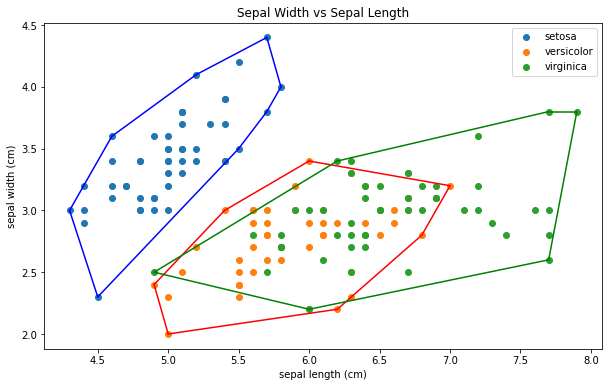

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn import datasets

data = datasets.load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names) 
df['Target'] = pd.DataFrame(data.target)
print(df.shape)
df.head()

#visualisasi hasil myConvexHull
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Sepal Width vs Sepal Length') 
plt.xlabel(data.feature_names[0]) 
plt.ylabel(data.feature_names[1])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    hull = myConvexHull(bucket) #pemanggilan convex hull
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i]) 
    # plotting hasil dalam plot garis
    for j in range(len(hull)-1):
        plt.plot((hull[j][0], hull[j+1][0]), (hull[j][1], hull[j+1][1]), colors[i]) 
plt.legend()

(150, 5)


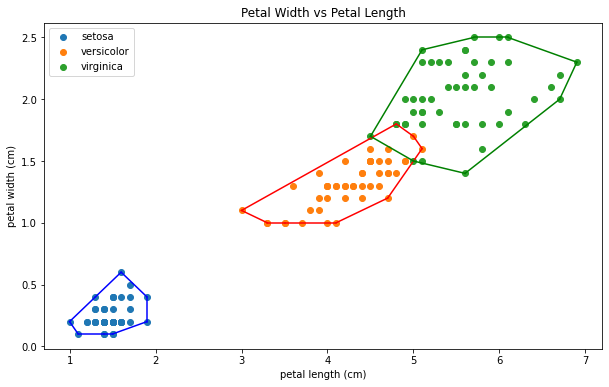

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn import datasets

data = datasets.load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names) 
df['Target'] = pd.DataFrame(data.target)
print(df.shape)
df.head()

#visualisasi hasil myConvexHull
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Petal Width vs Petal Length') 
plt.xlabel(data.feature_names[2]) 
plt.ylabel(data.feature_names[3])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[2,3]].values
    hull = myConvexHull(bucket) #pemanggilan convex hull
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i]) 
    # plotting hasil dalam plot garis
    for j in range(len(hull)-1):
        plt.plot((hull[j][0], hull[j+1][0]), (hull[j][1], hull[j+1][1]), colors[i]) 
plt.legend()

(569, 31)


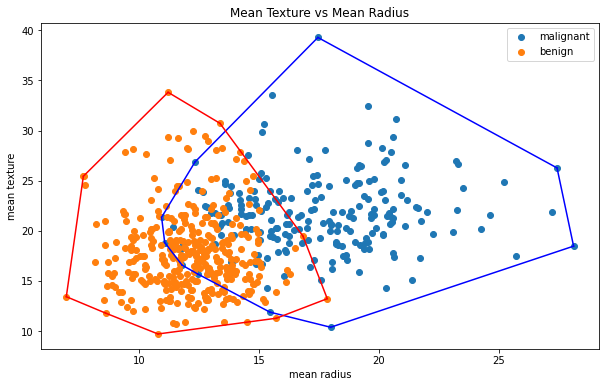

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn import datasets

data = datasets.load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names) 
df['Target'] = pd.DataFrame(data.target)
print(df.shape)
df.head()

#visualisasi hasil myConvexHull
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Mean Texture vs Mean Radius') 
plt.xlabel(data.feature_names[0]) 
plt.ylabel(data.feature_names[1])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    hull = myConvexHull(bucket) #pemanggilan convex hull
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i]) 
    # plotting hasil dalam plot garis
    for j in range(len(hull)-1):
        plt.plot((hull[j][0], hull[j+1][0]), (hull[j][1], hull[j+1][1]), colors[i]) 
plt.legend()

(569, 31)


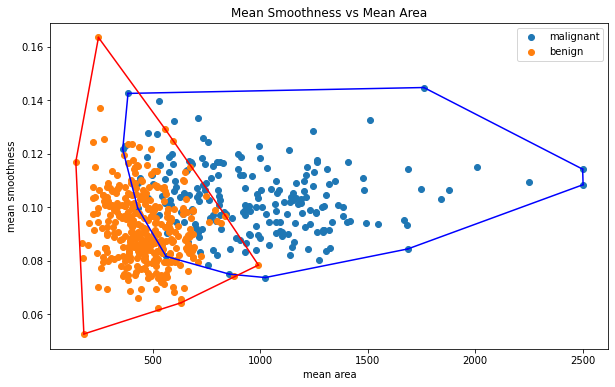

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn import datasets

data = datasets.load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names) 
df['Target'] = pd.DataFrame(data.target)
print(df.shape)
df.head()

#visualisasi hasil myConvexHull
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Mean Smoothness vs Mean Area') 
plt.xlabel(data.feature_names[3]) 
plt.ylabel(data.feature_names[4])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[3,4]].values
    hull = myConvexHull(bucket) #pemanggilan convex hull
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i]) 
    # plotting hasil dalam plot garis
    for j in range(len(hull)-1):
        plt.plot((hull[j][0], hull[j+1][0]), (hull[j][1], hull[j+1][1]), colors[i]) 
plt.legend()

(178, 14)


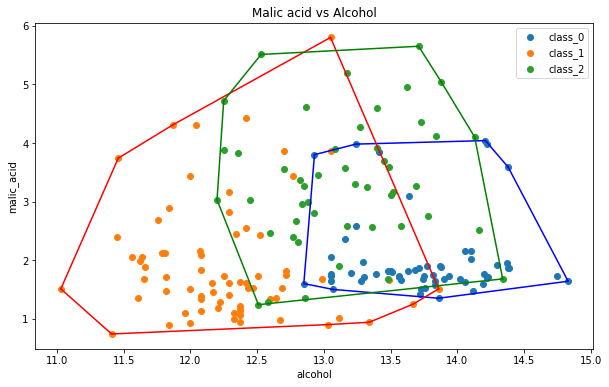

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn import datasets

data = datasets.load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names) 
df['Target'] = pd.DataFrame(data.target)
print(df.shape)
df.head()

#visualisasi hasil myConvexHull
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Malic acid vs Alcohol') 
plt.xlabel(data.feature_names[0]) 
plt.ylabel(data.feature_names[1])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    hull = myConvexHull(bucket) #pemanggilan convex hull
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i]) 
    # plotting hasil dalam plot garis
    for j in range(len(hull)-1):
        plt.plot((hull[j][0], hull[j+1][0]), (hull[j][1], hull[j+1][1]), colors[i]) 
plt.legend()

(178, 14)


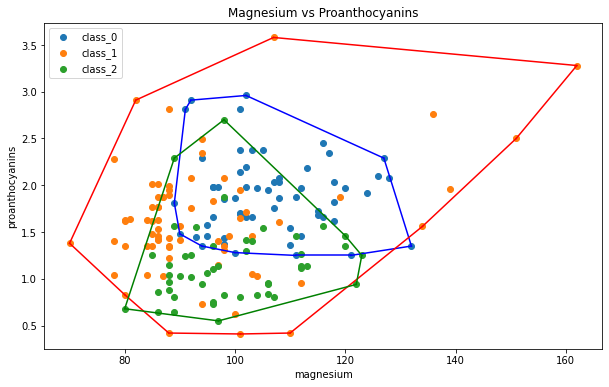

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn import datasets

data = datasets.load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names) 
df['Target'] = pd.DataFrame(data.target)
print(df.shape)
df.head()

#visualisasi hasil myConvexHull
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Magnesium vs Proanthocyanins') 
plt.xlabel(data.feature_names[4]) 
plt.ylabel(data.feature_names[8])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[4,8]].values
    hull = myConvexHull(bucket) #pemanggilan convex hull
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i]) 
    # plotting hasil dalam plot garis
    for j in range(len(hull)-1):
        plt.plot((hull[j][0], hull[j+1][0]), (hull[j][1], hull[j+1][1]), colors[i]) 
plt.legend()